In [164]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.gridspec as gridspec
import hist

In [165]:
import mplhep as hep
hep.style.use("CMS")

In [166]:
with open("qjetmass_zjets_gen_UL18NanoAODv9_all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [4]:
output['response_matrix_u']

Hist(
  StrCategory(['UL18NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 550, 650, 760, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 1000], name='mreco', label='m_{RECO} (GeV)'),
  Variable([200, 260, 350, 460, 550, 650, 760, 13000], name='ptgen', label='p_{T,RECO} (GeV)'),
  Variable(array([   0. ,    2.5,    5. ,    7.5,   10. ,   15. ,   20. ,   30. ,
         40. ,   50. ,   60. ,   70. ,   80. ,   90. ,  100. ,  125. ,
        150. ,  175. ,  200. ,  225. ,  250. ,  275. ,  300. ,  325. ,
        350. , 1000. ]), name='mgen', label='Mass [GeV]'),
  StrCategory(['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'murecoUp', 'murecoDown', 'JERUp', 'JERDown', 'JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown', 'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_Fragmen

/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Text(0, 1, '$\\frac{variation}{nominal}$')

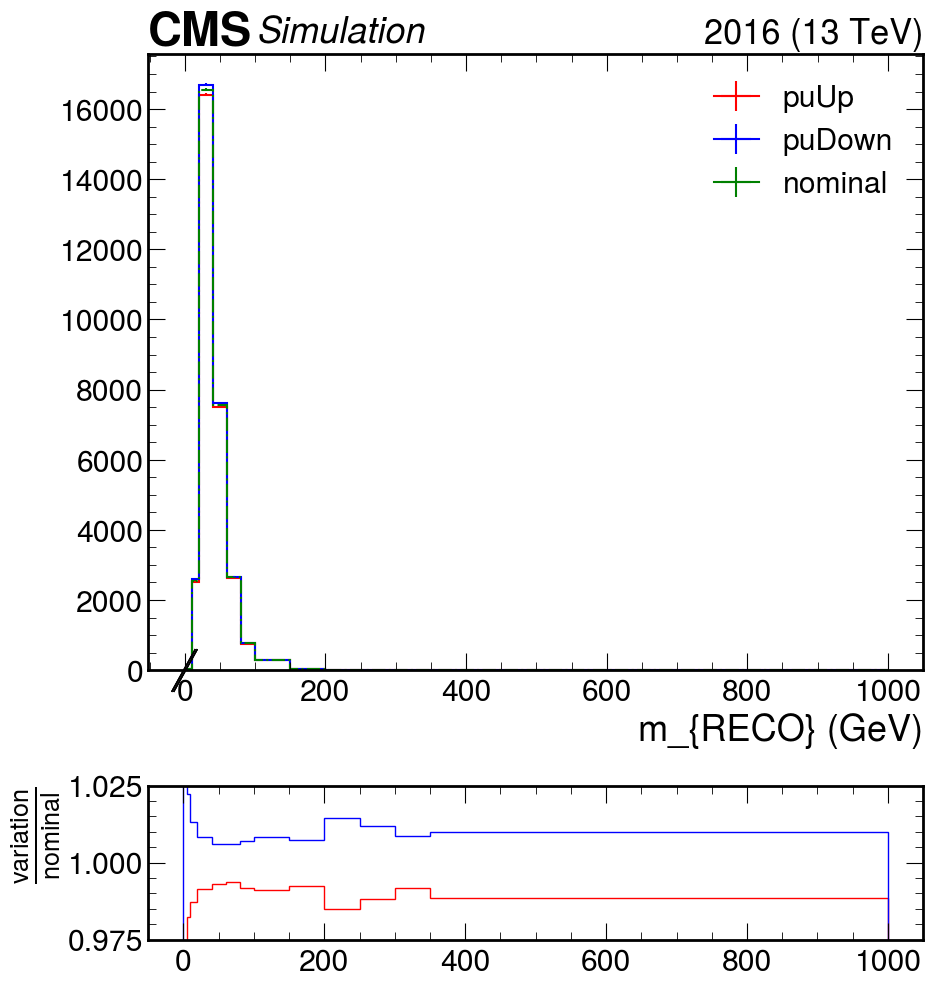

In [52]:
scale = 1
fig = plt.figure(figsize = (10*scale,11.5*scale))
gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)

ax = plt.subplot(gs[0])

h = output['response_matrix_u'].project("systematic","mreco")
filtered_hist_nom = h[["nominal"], :]
filtered_hist_up = h[["puUp"], :]
filtered_hist_down = h[["puDown"], :]


filtered_hist_up.plot(color = "r")
filtered_hist_down.plot(color = "b")
filtered_hist_nom.plot(color = "g", ls = "-.")
plt.legend()
hep.cms.label(year = 2016)


ax2 = plt.subplot(gs[1])

h = output['response_matrix_u'].project("systematic","mreco")
nom = h[[ "nominal"], :].values()[0]
up = h[[ "puUp"], :].values()[0]
down = h[[ "puDown"], :].values()[0]
ratio_axis = h[[ "nominal"],:].axes[1].edges
hup_ratio = up/nom
hdown_ratio = down/nom

plt.ylim(0.975,1.025)
plt.stairs( hup_ratio,ratio_axis, label = "up", color = "r")
plt.stairs( hdown_ratio, ratio_axis, label = "down", color = "b")
plt.ylabel(r"$\frac{variation}{nominal}$")
#plt.legend(fontsize = 15, loc = (1.04,0.5))


In [167]:
def plot_updown(systematic = "pu", hists =  output, ylim = 0.025 , variable = "mreco", year = "2016"):
    scale = 1
    fig = plt.figure(figsize = (10*scale,11.5*scale))
    gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)
    
    ax = plt.subplot(gs[0])
    
    h = output['response_matrix_u'].project("systematic",variable)
    

    filtered_hist_nom = h[["nominal"], :]
    filtered_hist_up = h[[systematic+"Up"], :]
    filtered_hist_down = h[[systematic+"Down"], :]
    
    filtered_hist_up.plot(color = "r")
    filtered_hist_down.plot(color = "b")
    filtered_hist_nom.plot(color = "g", ls = "-.")

    
    plt.xlim(-20,1000)
    plt.ylabel("Event weights")
    plt.xlabel(r"${}$".format(filtered_hist_nom.axes[1].label))
    plt.legend()
    hep.cms.label(year = year)

    
    ax2 = plt.subplot(gs[1])
    
    h = output['response_matrix_u'].project("systematic","mreco")
    nom = h[[ "nominal"], :].values()[0]
    up = h[[ systematic+"Up"], :].values()[0]
    down = h[[ systematic+"Down"], :].values()[0]
    ratio_axis = h[[ "nominal"],:].axes[1].edges
    hup_ratio = up/nom
    hdown_ratio = down/nom

    plt.xlim(-20,1000)
    plt.ylim(1+ylim, 1- ylim)
    plt.stairs( hup_ratio,ratio_axis, label = "up", color = "r")
    plt.stairs( hdown_ratio, ratio_axis, label = "down", color = "b")
    plt.hlines(1, -20, 1000, color = "black")
    plt.ylabel(r"$\frac{variation}{nominal}$")
    
    plt.savefig("plots/{}/jet_syst/{}_{}_{}.png".format(year, year, variable, systematic))


In [168]:
# def plot_updown_jets(systematic = "pu", hists =  output, ylim = 0.025 ):
#     scale = 1
#     fig = plt.figure(figsize = (10*scale,11.5*scale))
#     gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)
    
#     ax = plt.subplot(gs[0])
    
#     h = output['response_matrix_u'].project("systematic","mreco")
#     filtered_hist = h[["nominal", systematic+"_up",systematic+"_down"], :]
#     filtered_hist.plot()

#     plt.legend()
#     hep.cms.label(year = 2016)
#     ax2 = plt.subplot(gs[1])
    
#     h = output['response_matrix_u'].project("systematic","mreco")
#     nom = h[[ "nominal"], :].values()[0]
#     up = h[[ systematic+"_up"], :].values()[0]
#     down = h[[ systematic+"_down"], :].values()[0]
#     ratio_axis = h[[ "nominal"],:].axes[1].edges
#     hup_ratio = up/nom
#     hdown_ratio = down/nom
    
#     plt.ylim(1+ylim, 1- ylim)
#     plt.stairs( hup_ratio,ratio_axis, label = "up")
#     plt.stairs( hdown_ratio, ratio_axis, label = "down")

#     plt.legend(fontsize = 15, loc = (1.04,0.5))

In [173]:

def save_syst_plots( variable = "mreco" , year = "2018", systematics = ["pu"]):
    year_tag_dict = {"2016":"UL16NanoAODv9","2017":"UL17NanoAODv9", "2018": "UL17NanoAODv9"}
    
    with open("qjetmass_zjets_gen_{}_all_syst.pkl".format(year_tag_dict[year]), "rb") as f:
        output = pickle.load( f )
    for systematic in systematics:
        plot_updown(systematic = systematic, hists =  output, variable = variable,  ylim = 0.025, year = year)

In [174]:
syst_list = ['JER',
 'JES_AbsoluteMPFBias',
 'JES_AbsoluteScale',
 'JES_AbsoluteStat',
 'JES_FlavorQCD',
 'JES_Fragmentation',
 'JES_PileUpDataMC',
 'JES_PileUpPtBB',
 'JES_PileUpPtEC1',
 'JES_PileUpPtEC2',
 'JES_PileUpPtHF',
 'JES_PileUpPtRef',
 'JES_RelativeFSR',
 'JES_RelativeJEREC1',
 'JES_RelativeJEREC2',
 'JES_RelativeJERHF',
 'JES_RelativePtBB',
 'JES_RelativePtEC1',
 'JES_RelativePtEC2',
 'JES_RelativePtHF',
 'JES_RelativeBal',
 'JES_RelativeSample',
 'JES_RelativeStatEC',
 'JES_RelativeStatFSR',
 'JES_RelativeStatHF',
 'JES_SinglePionECAL',
 'JES_SinglePionHCAL',
 'JES_TimePtEta']

/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not

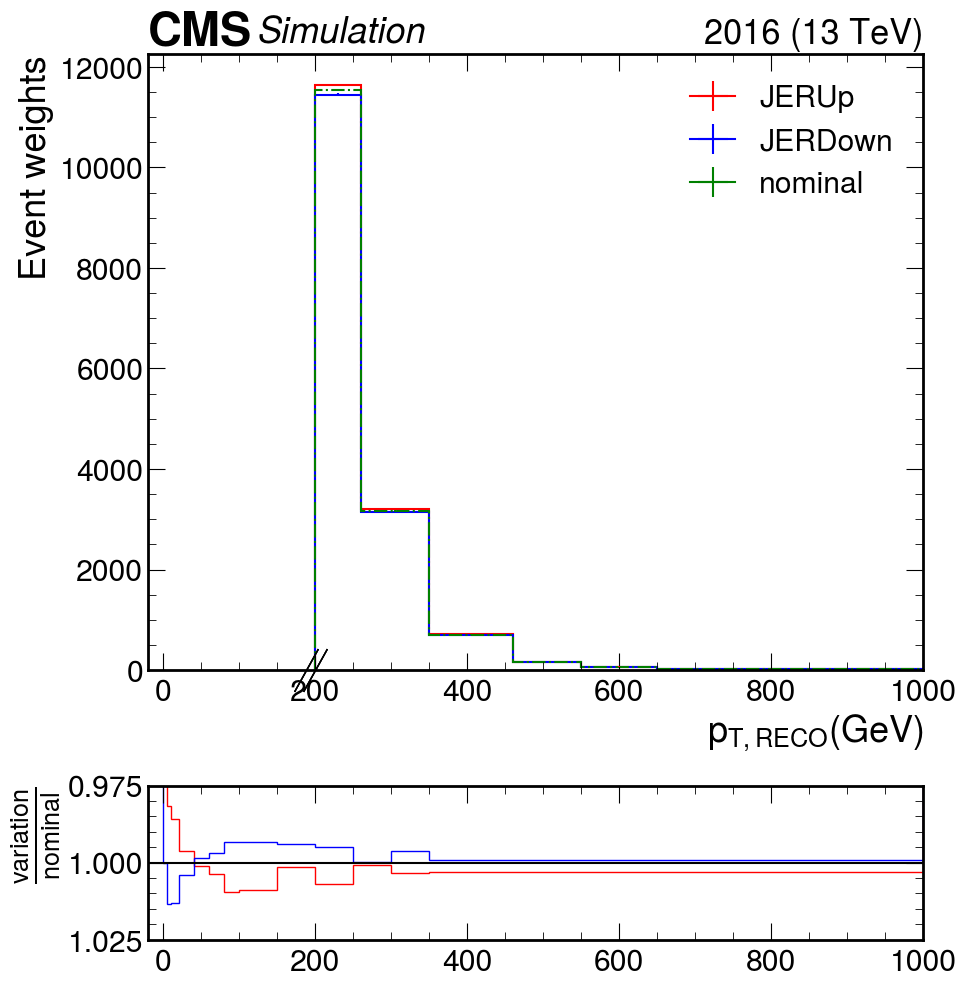

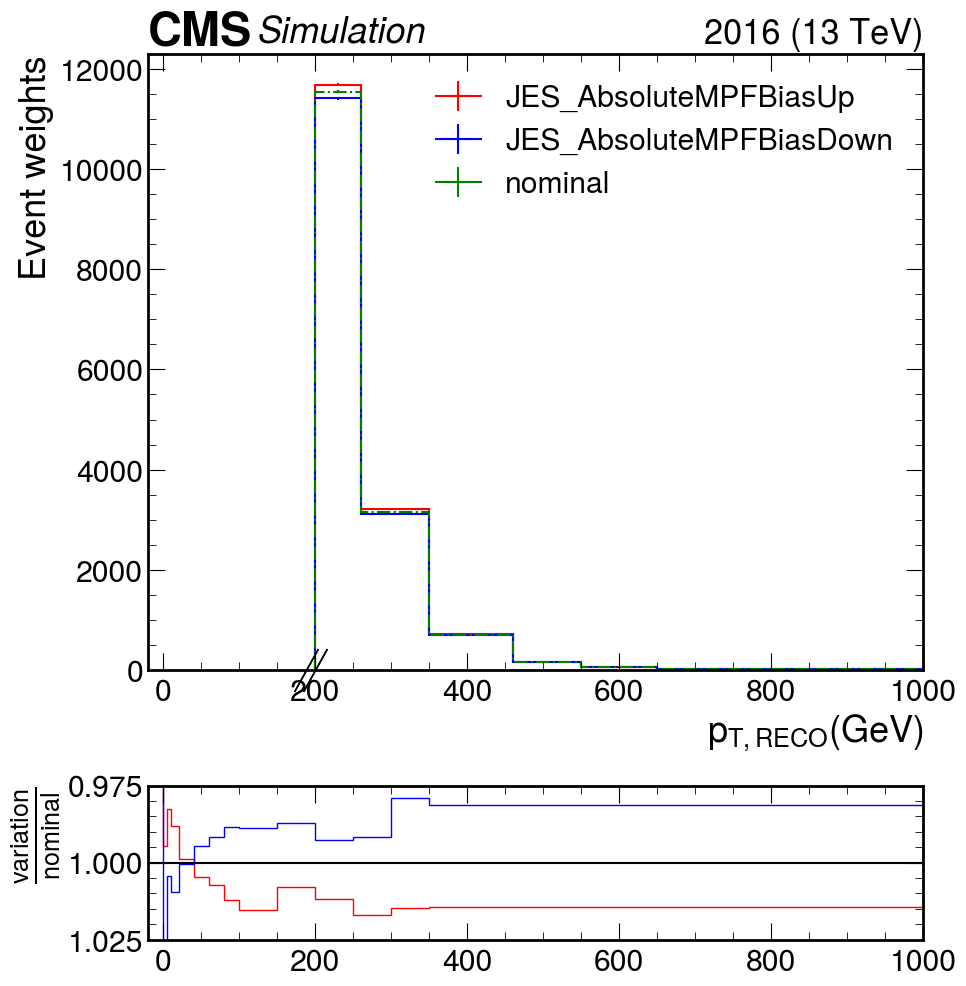

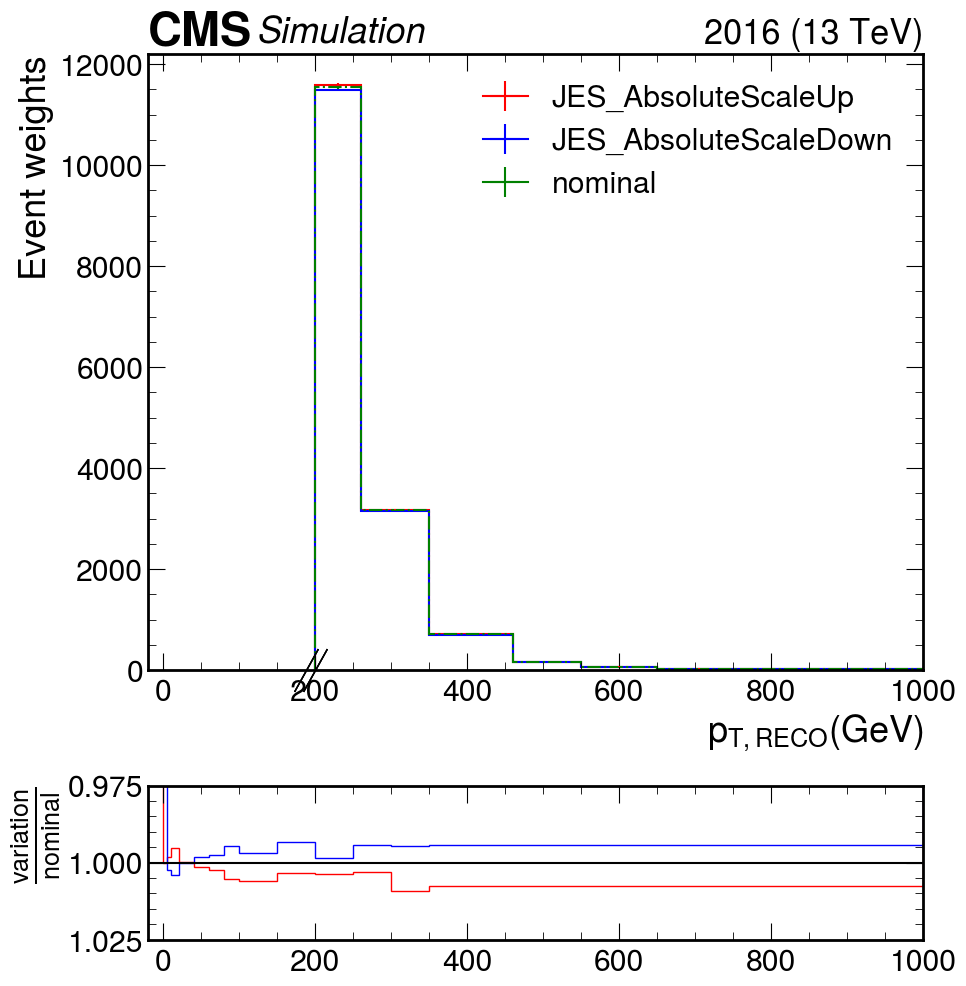

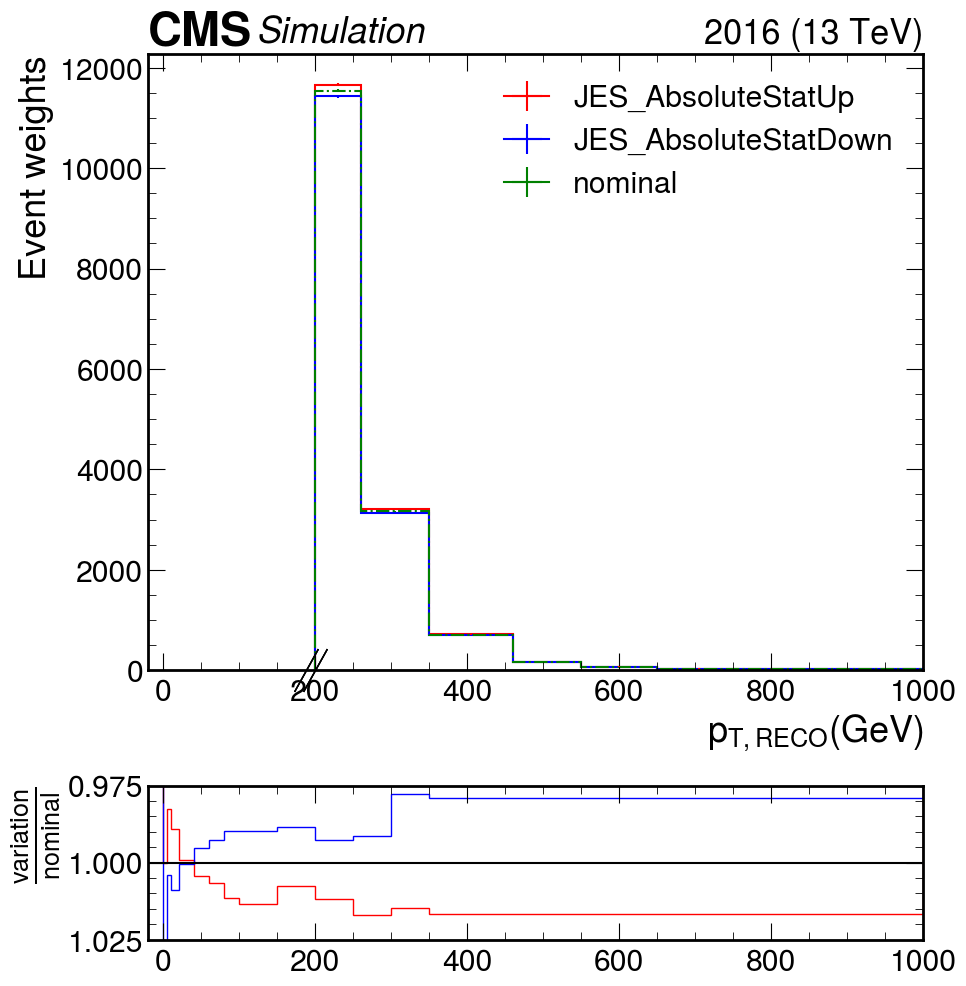

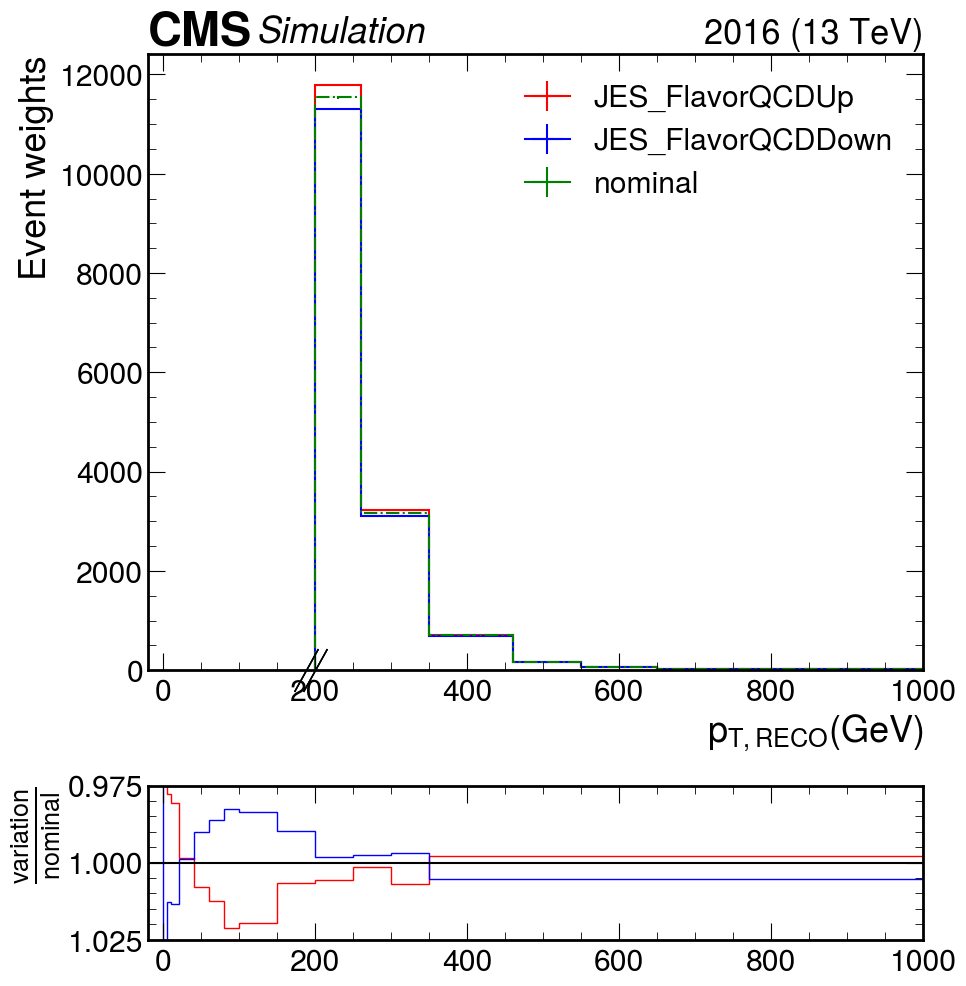

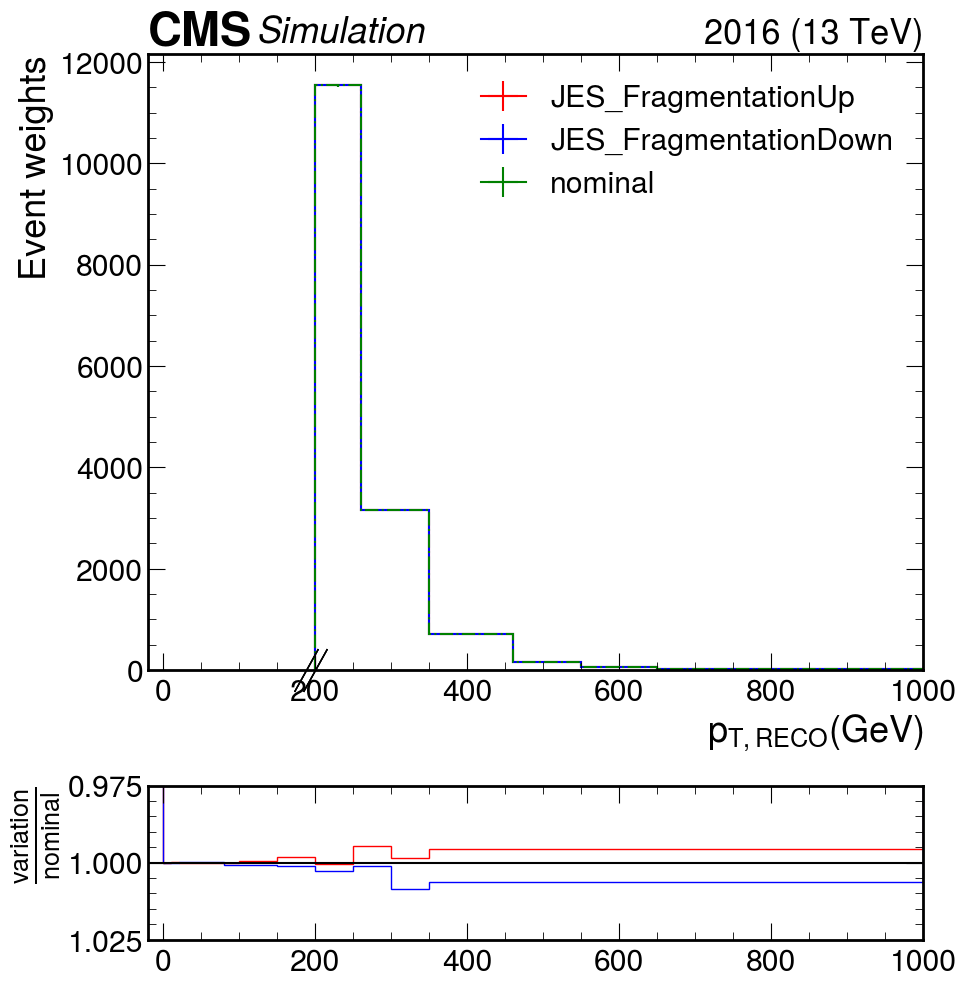

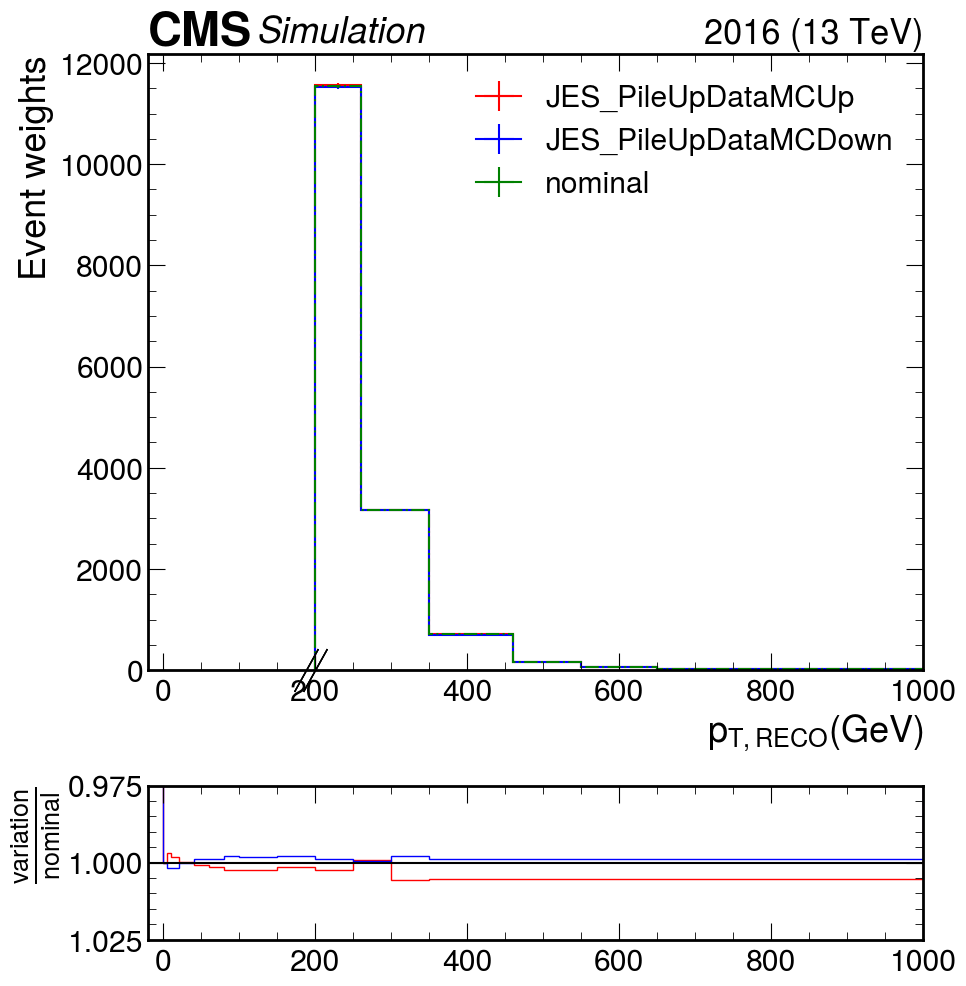

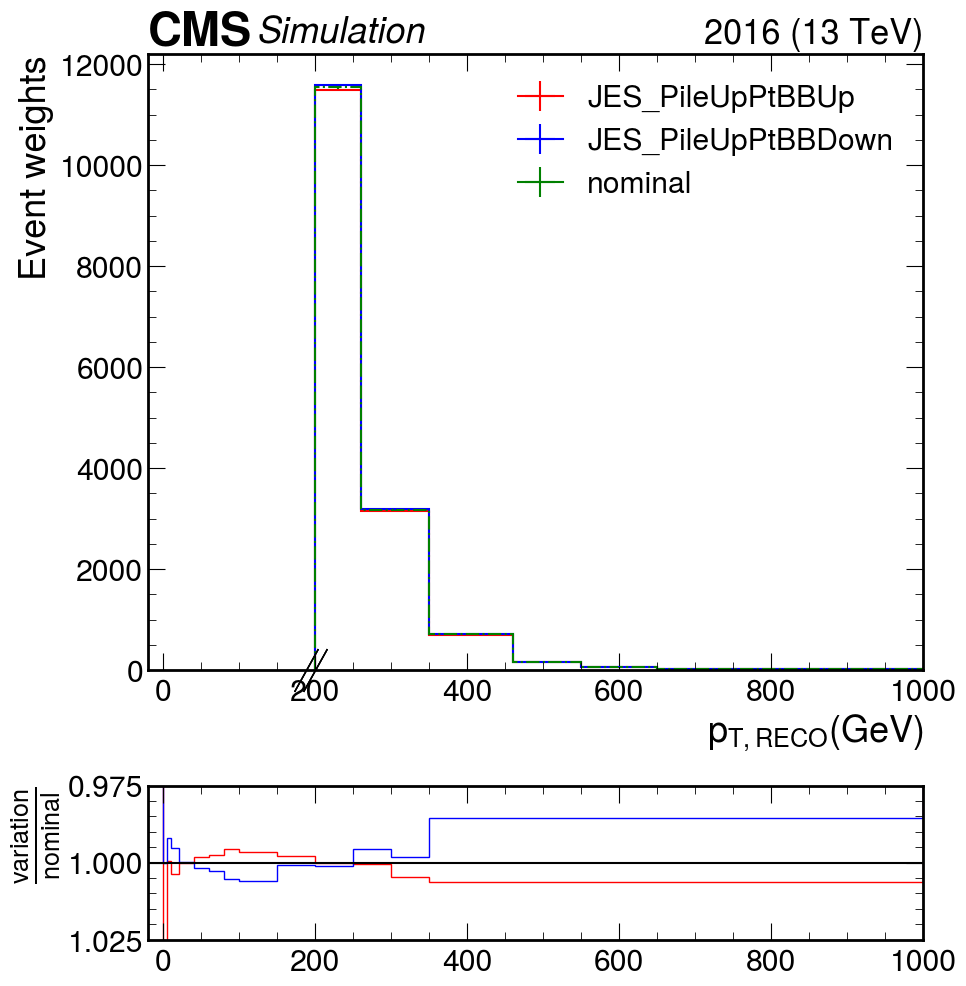

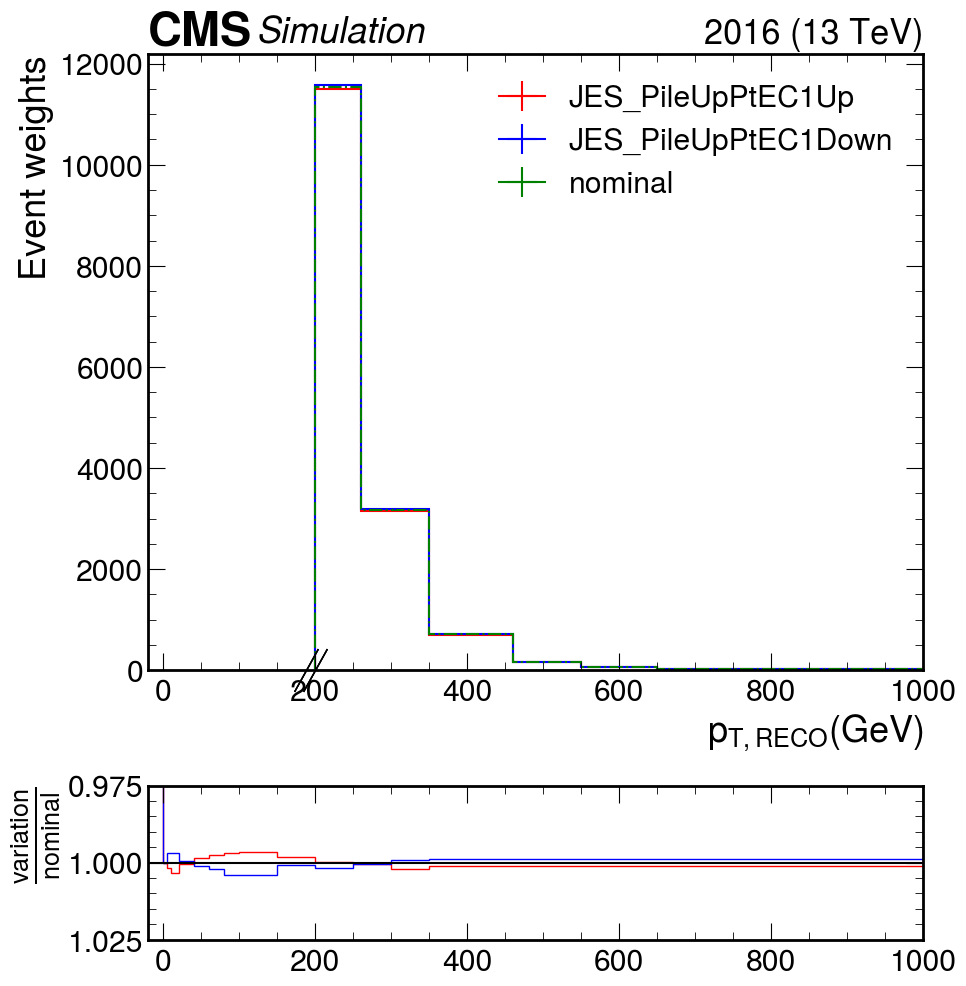

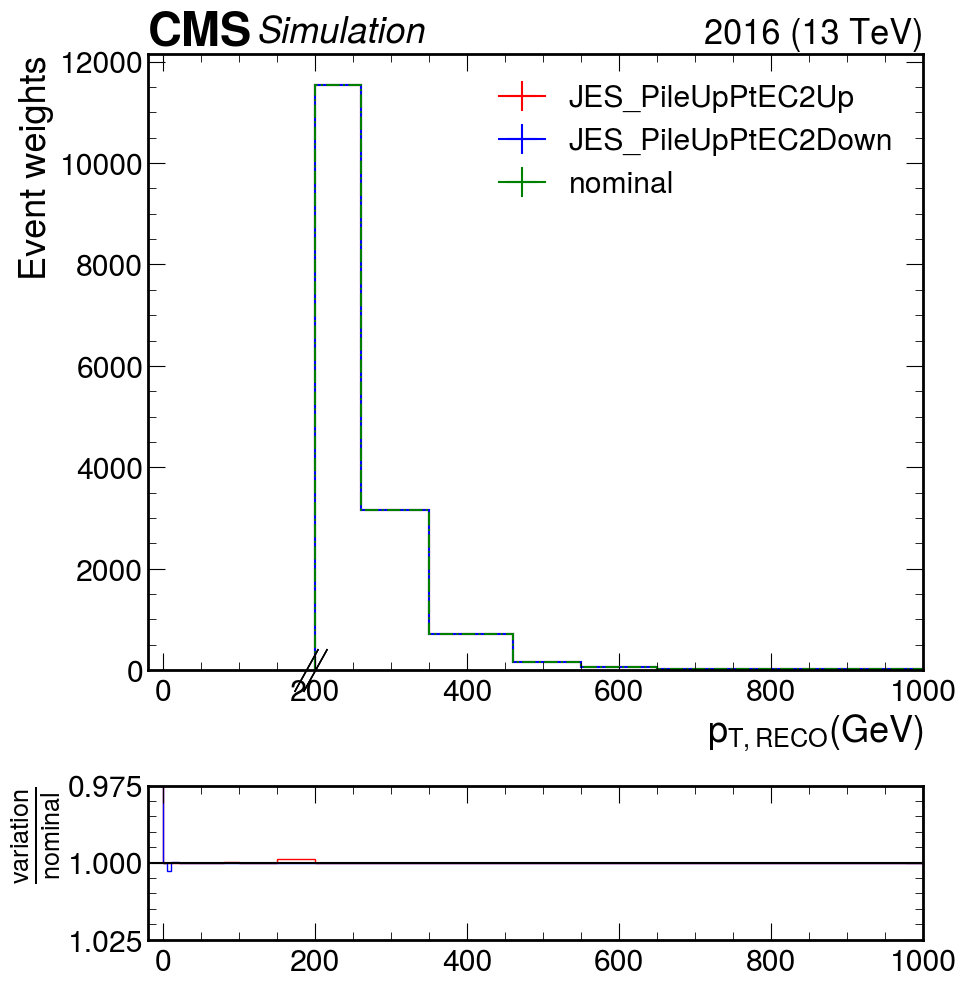

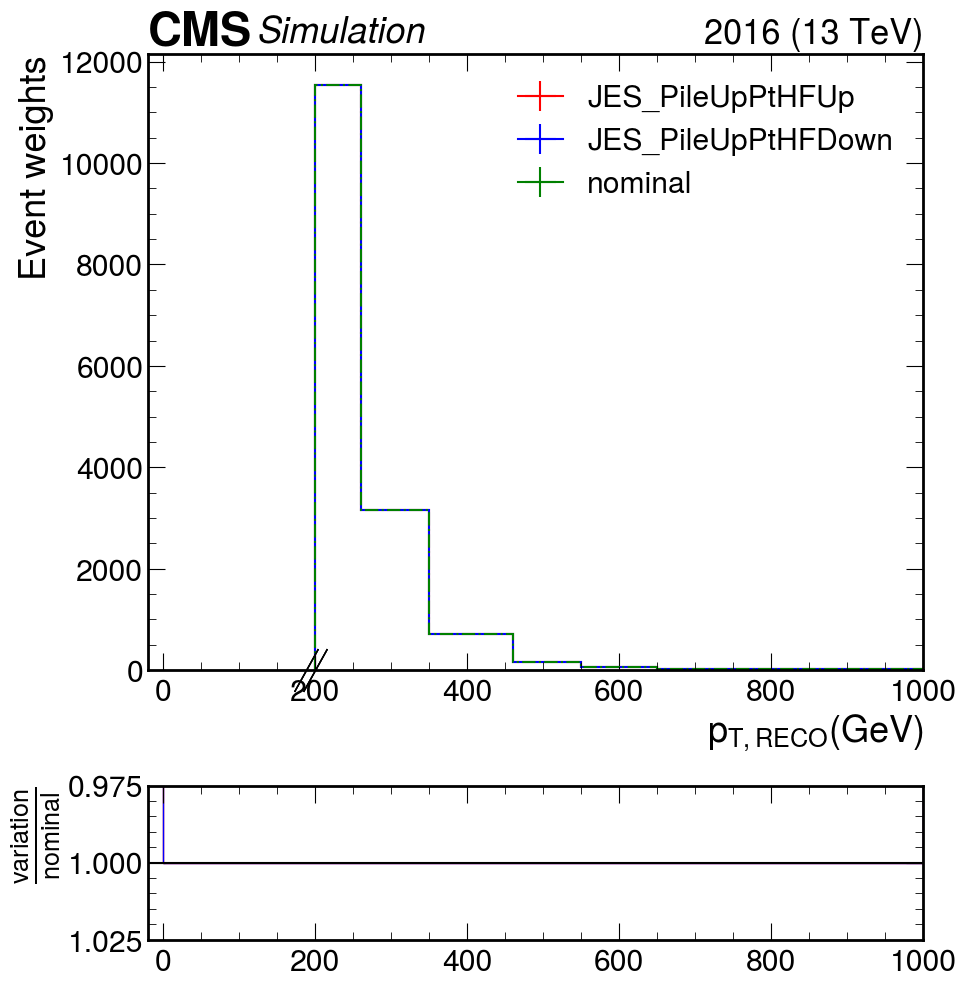

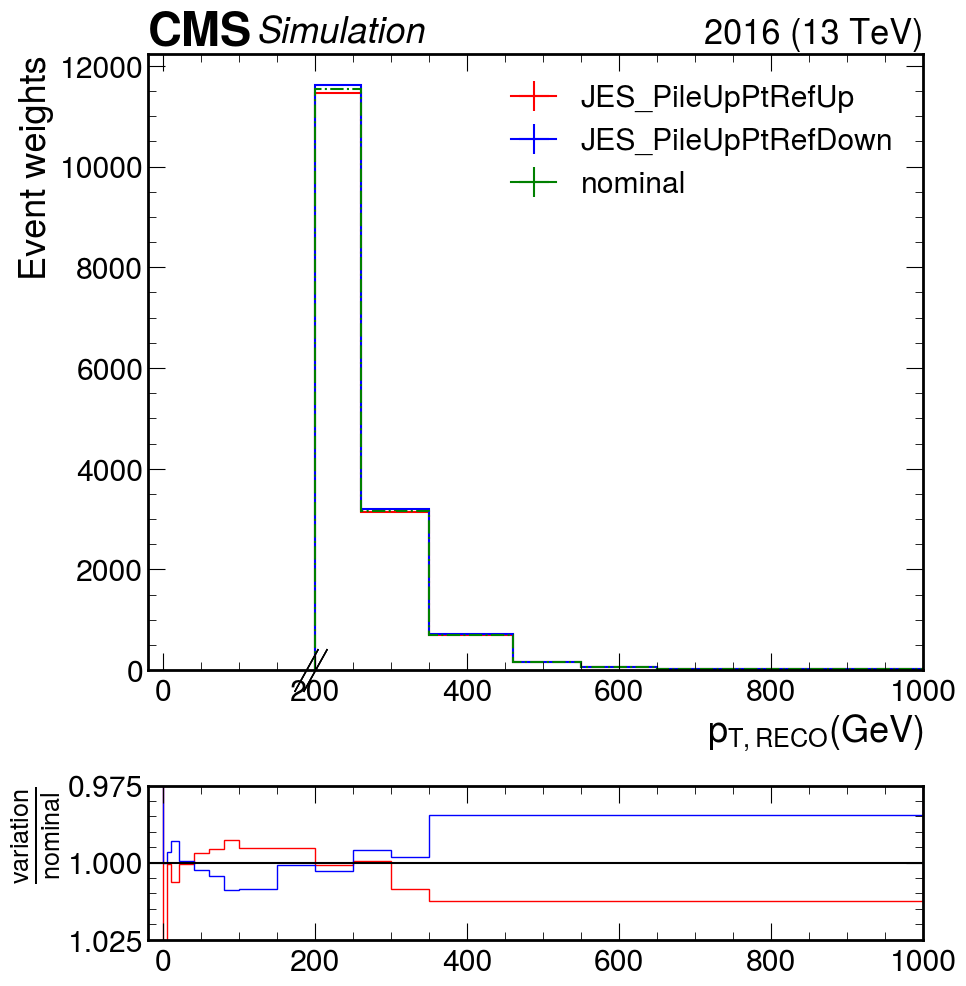

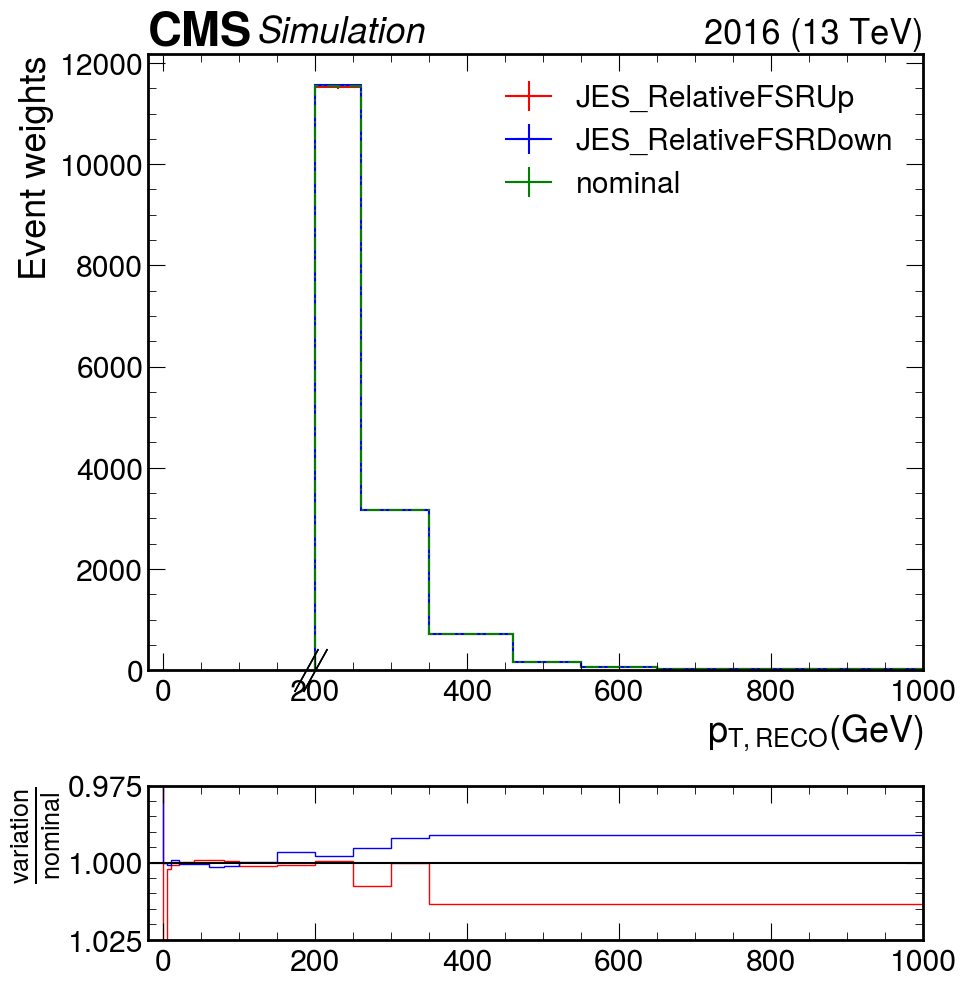

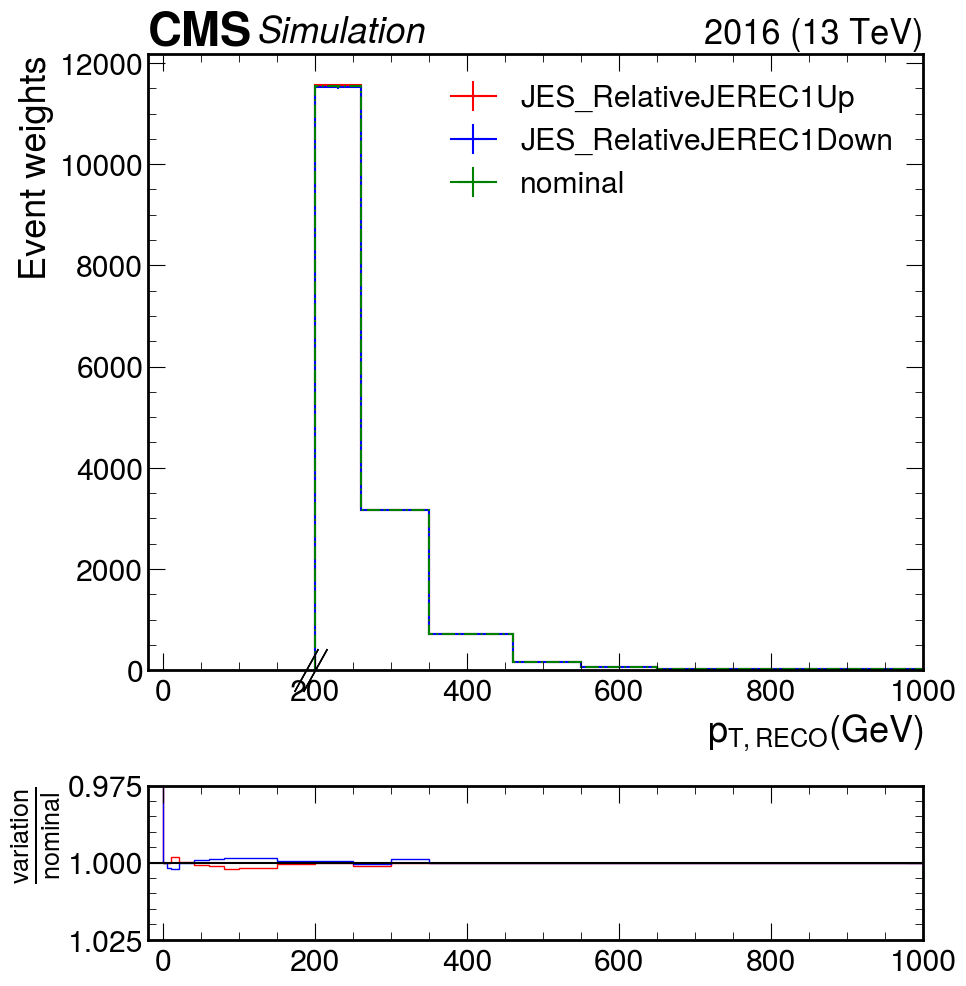

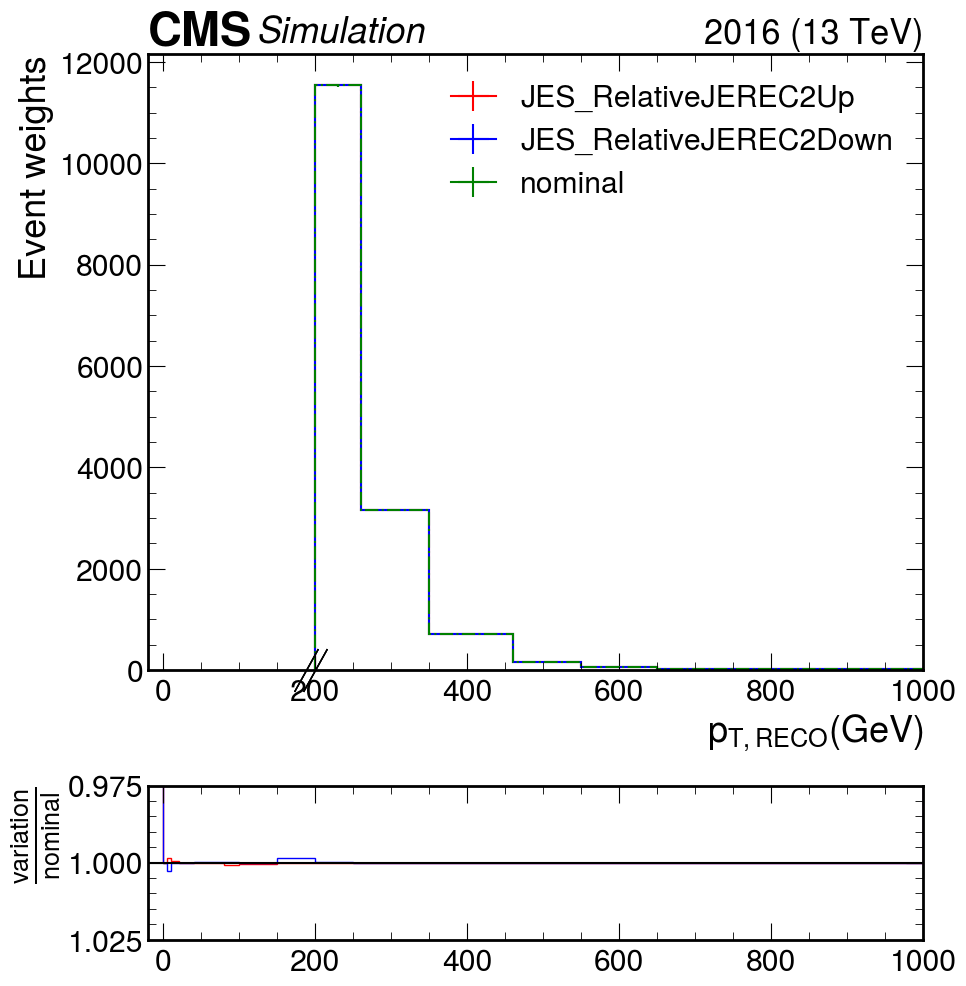

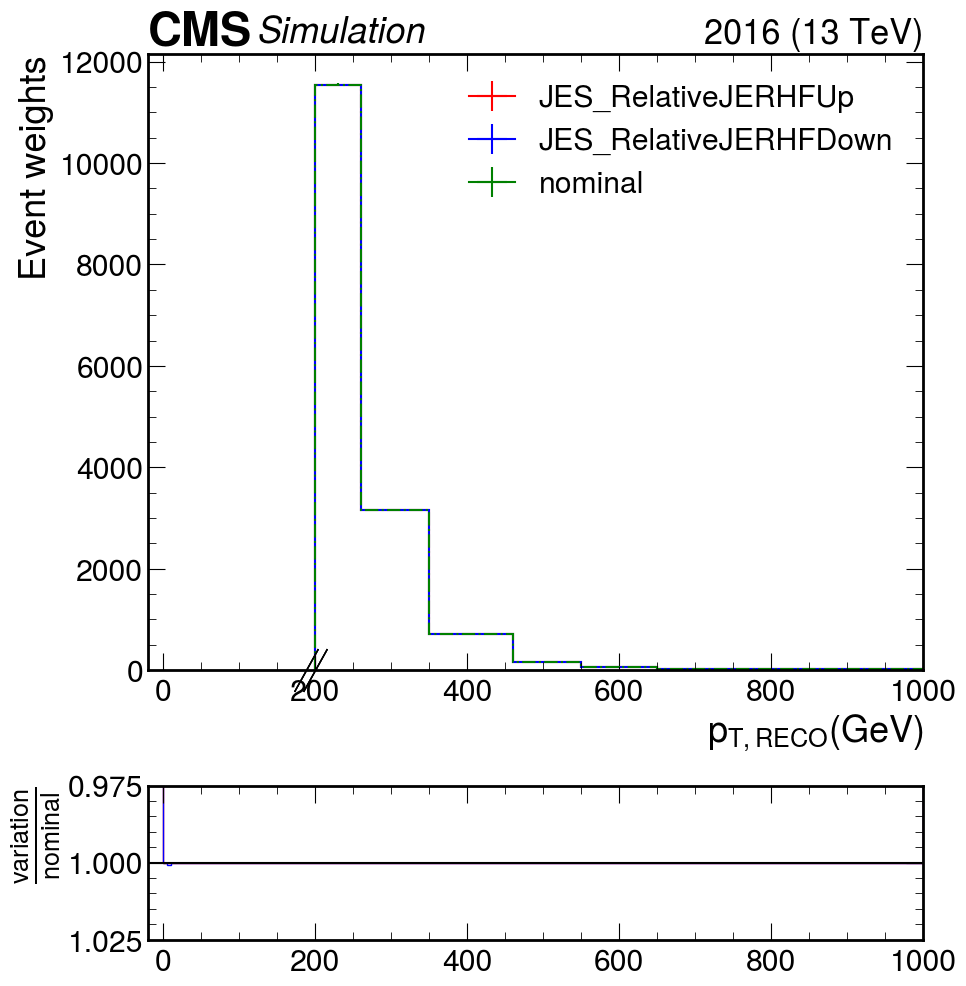

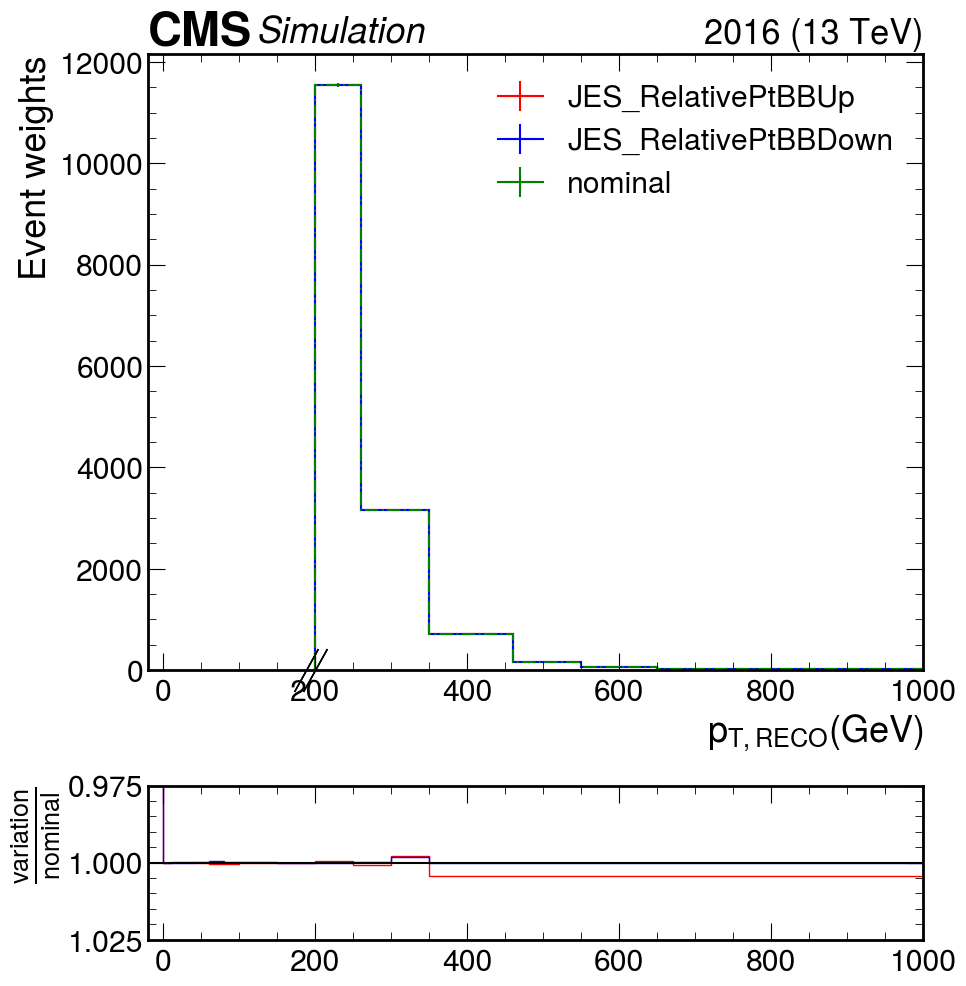

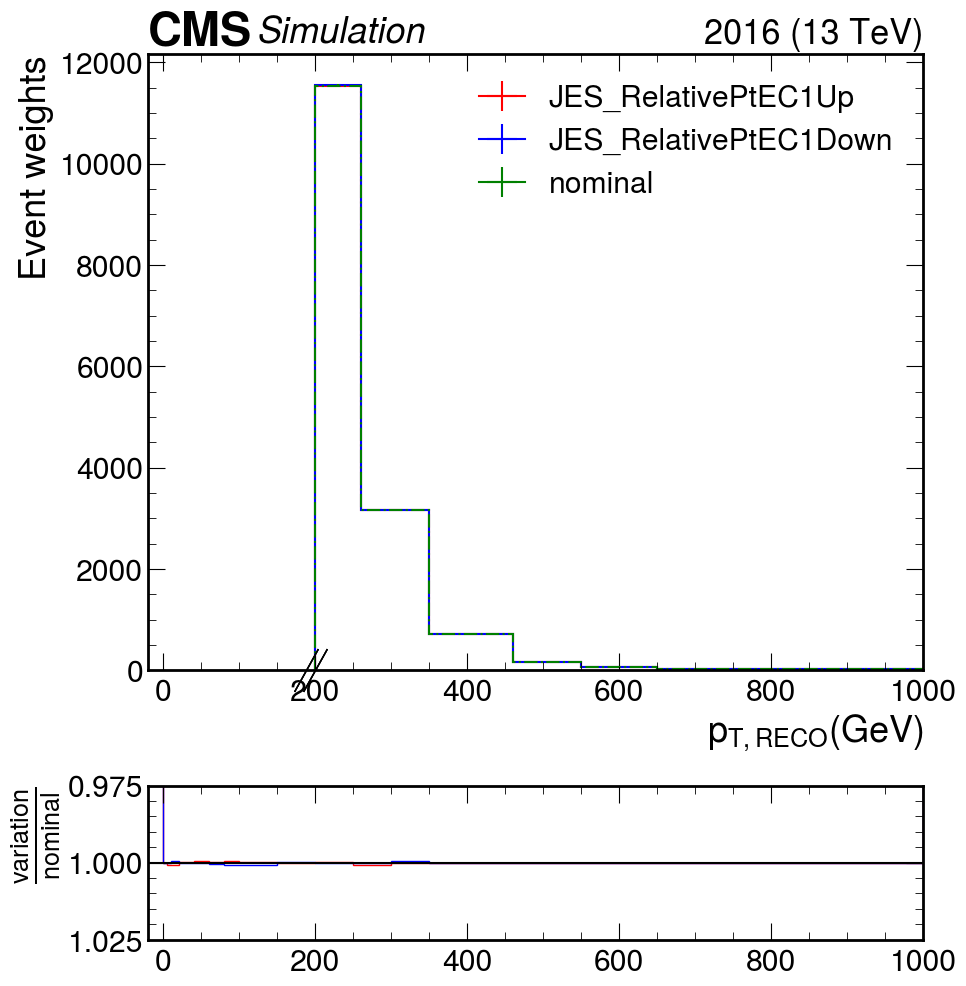

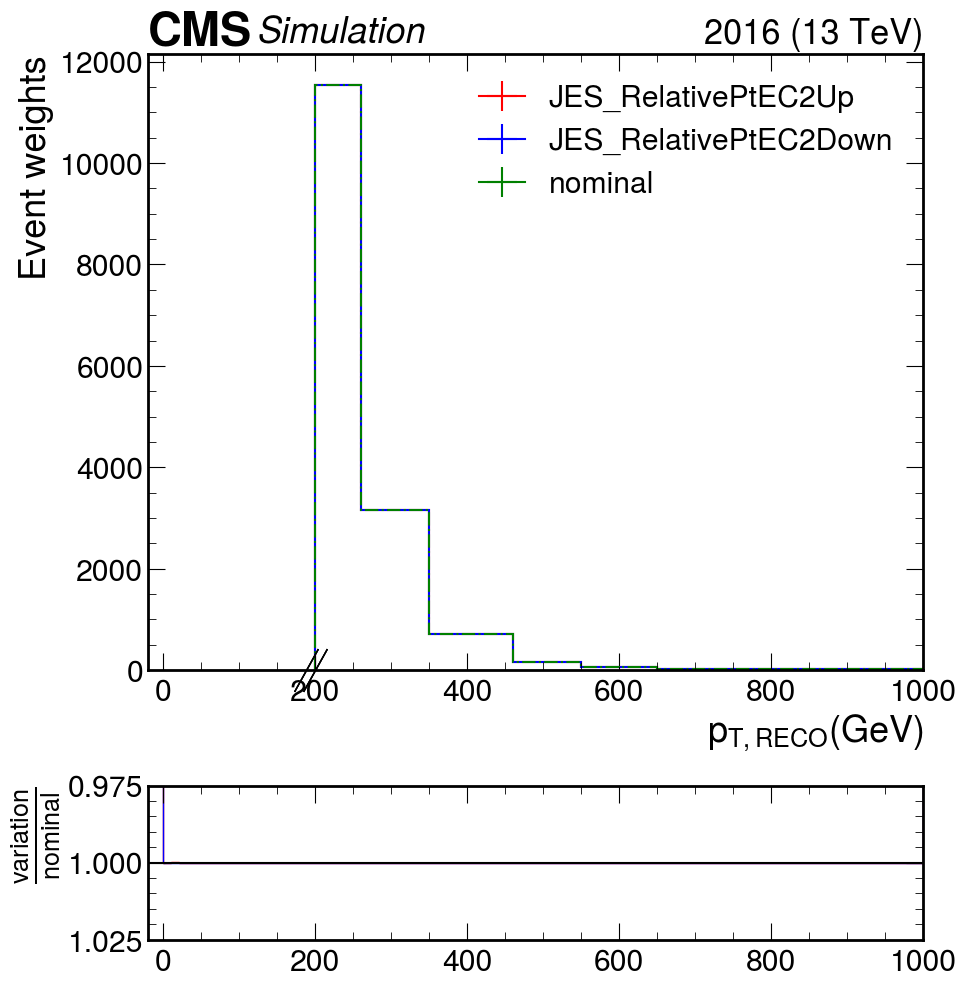

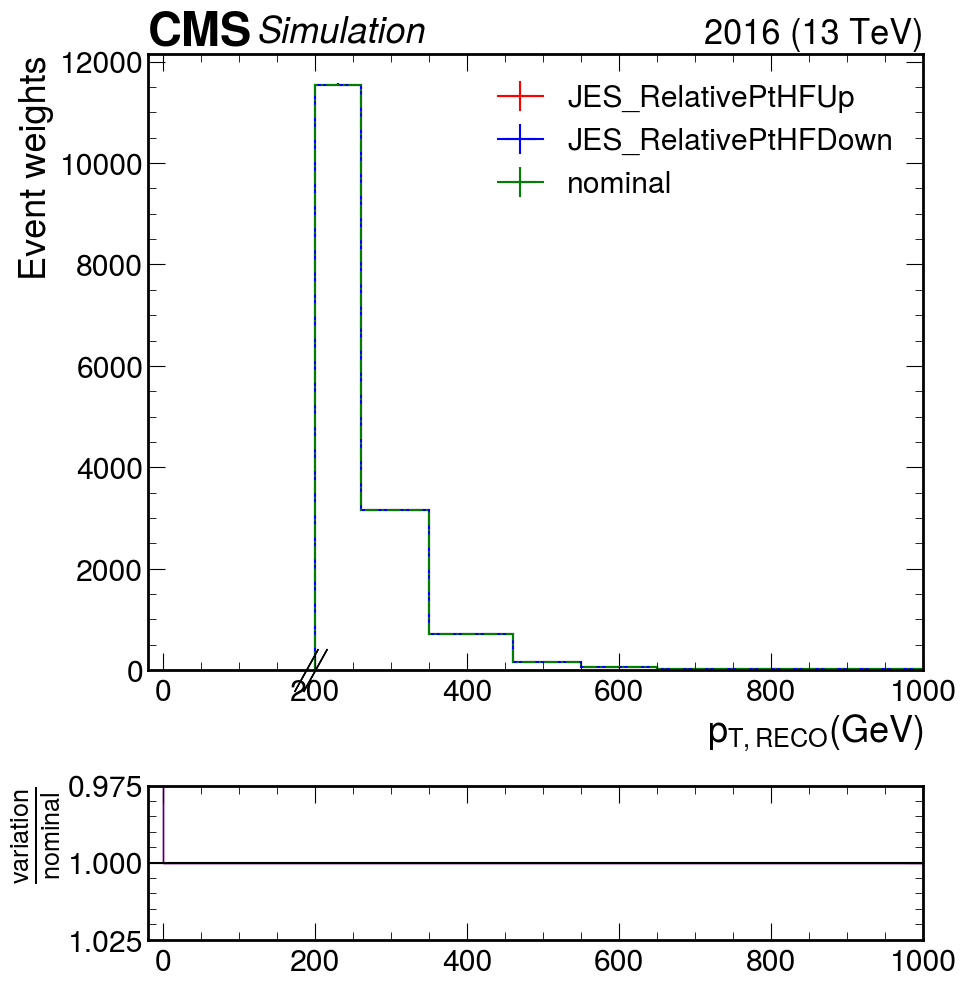

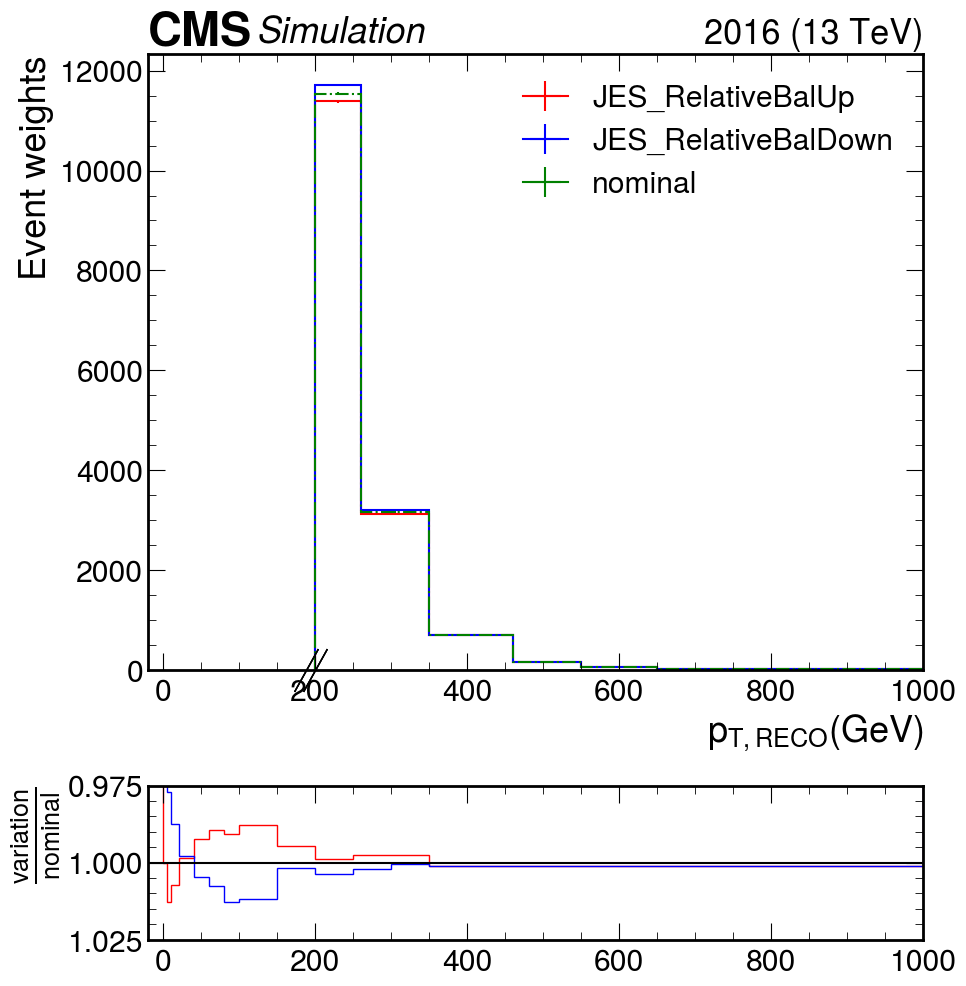

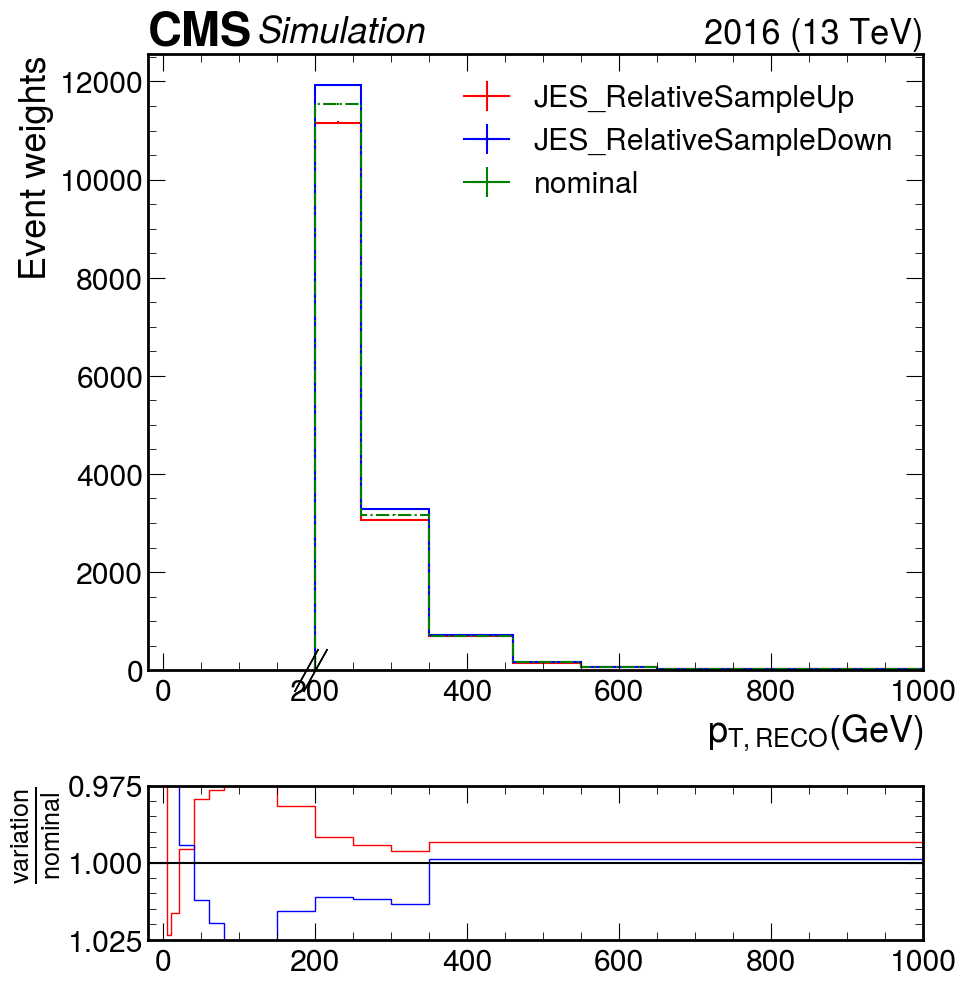

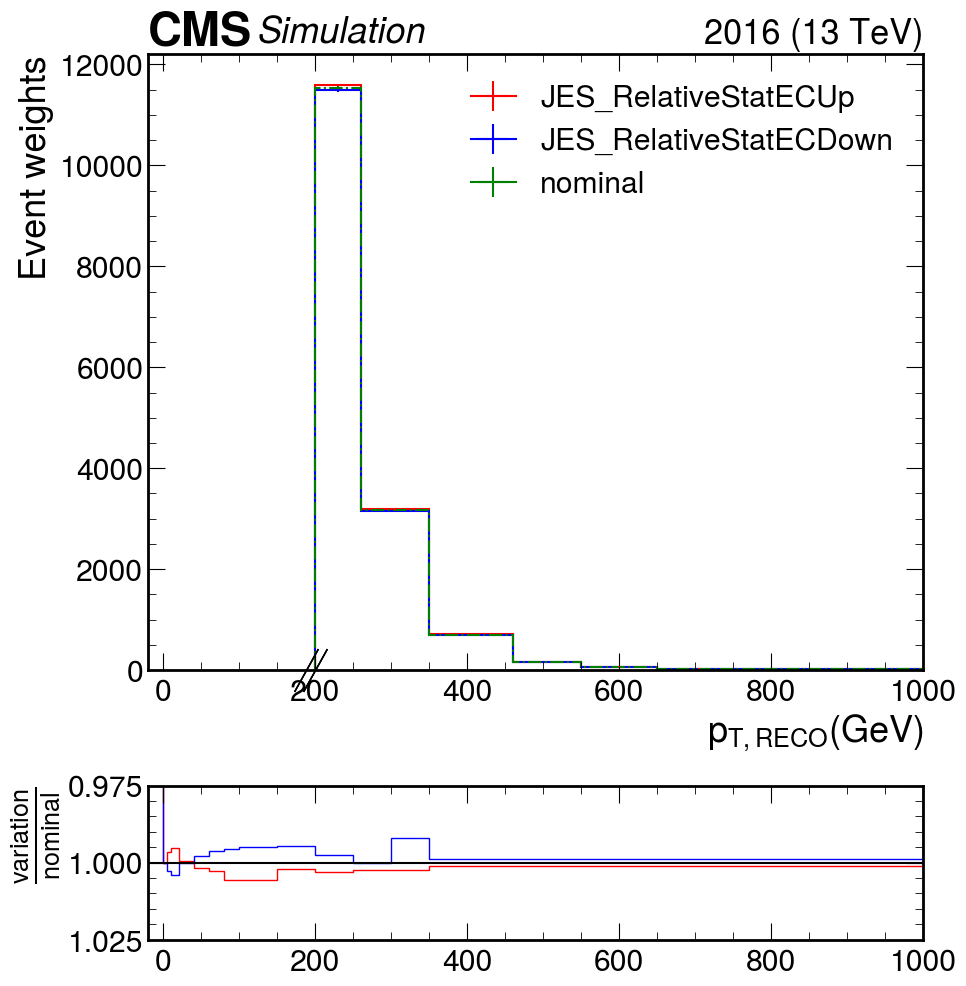

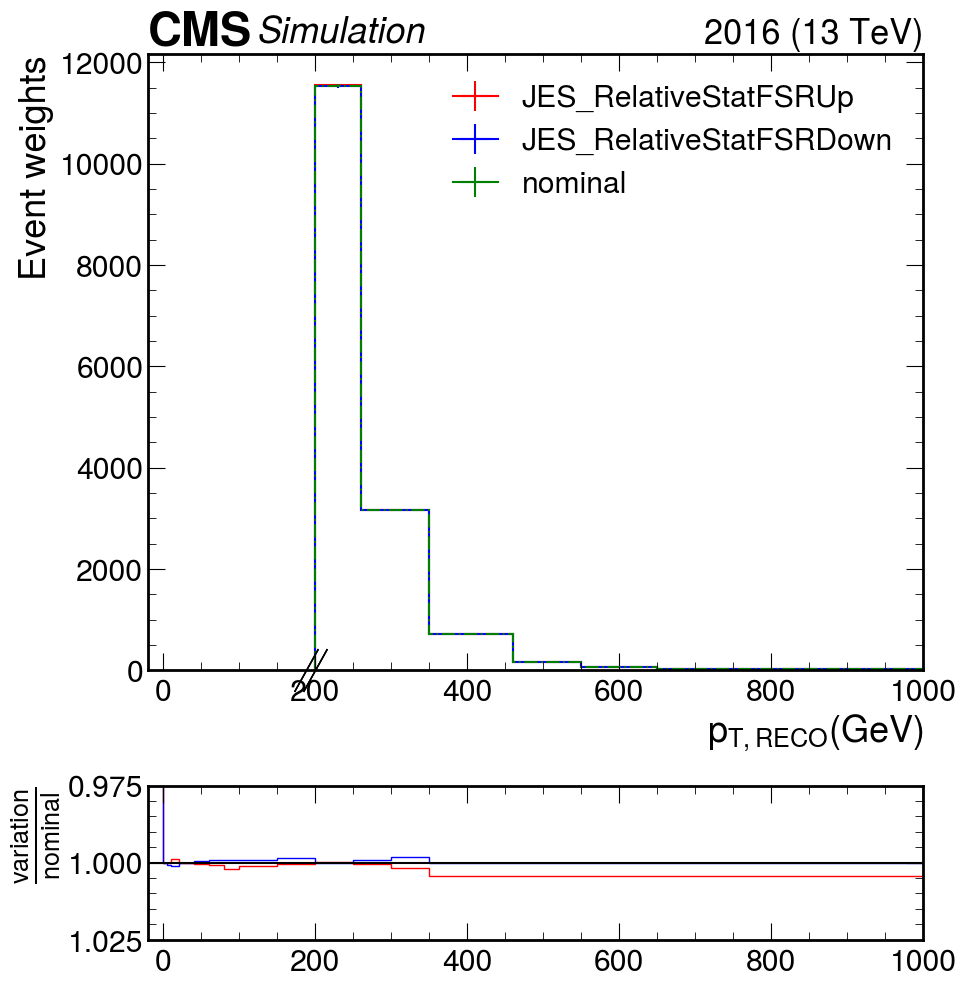

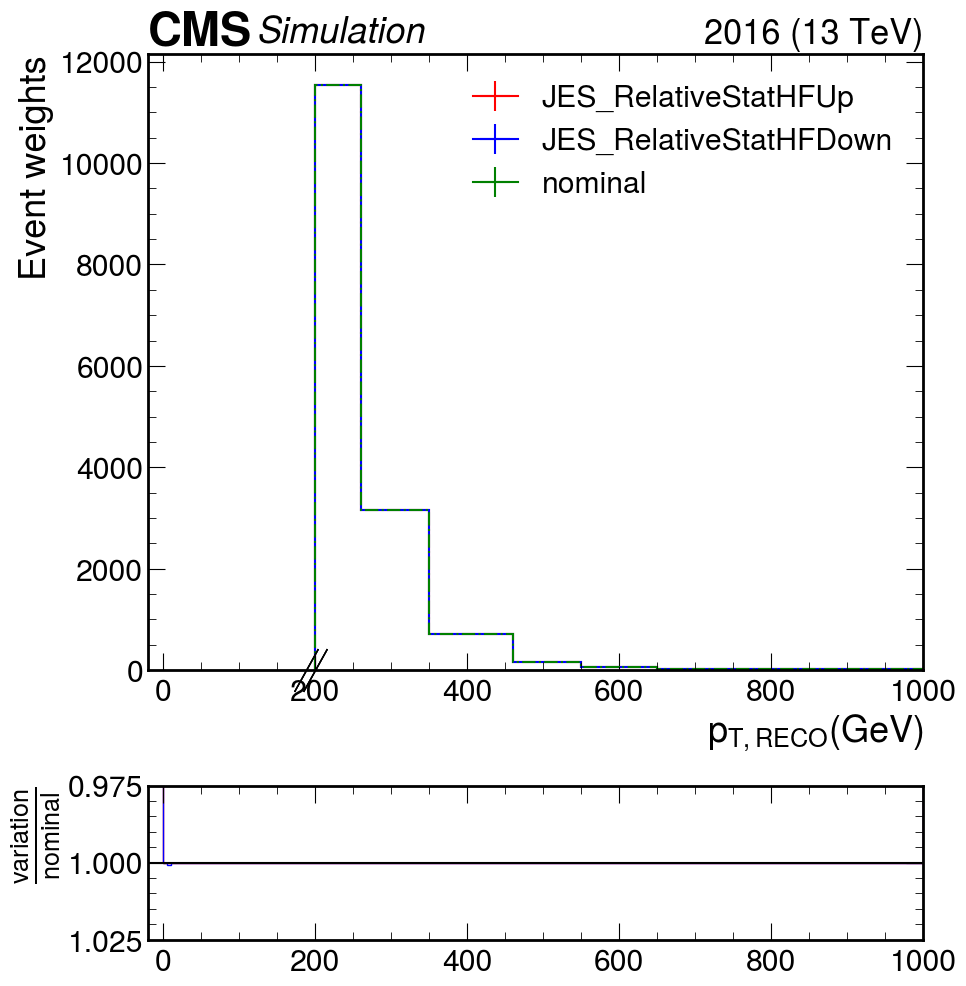

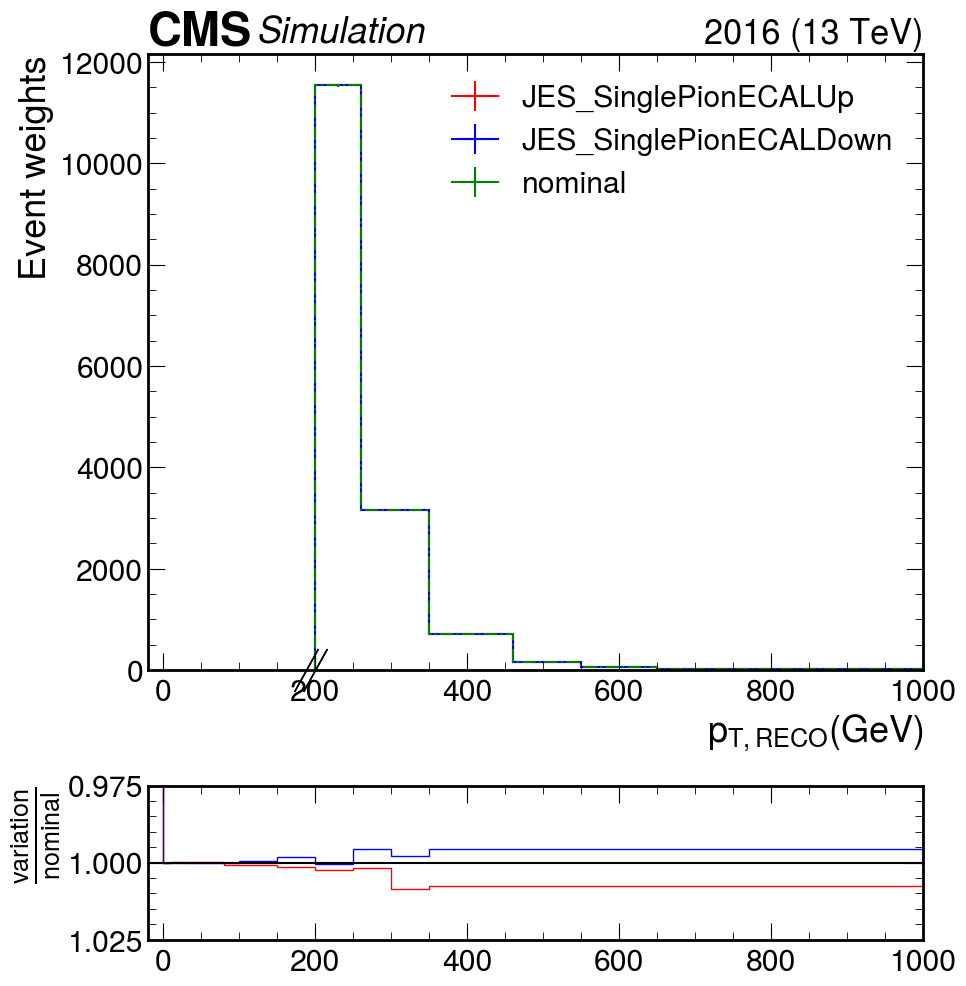

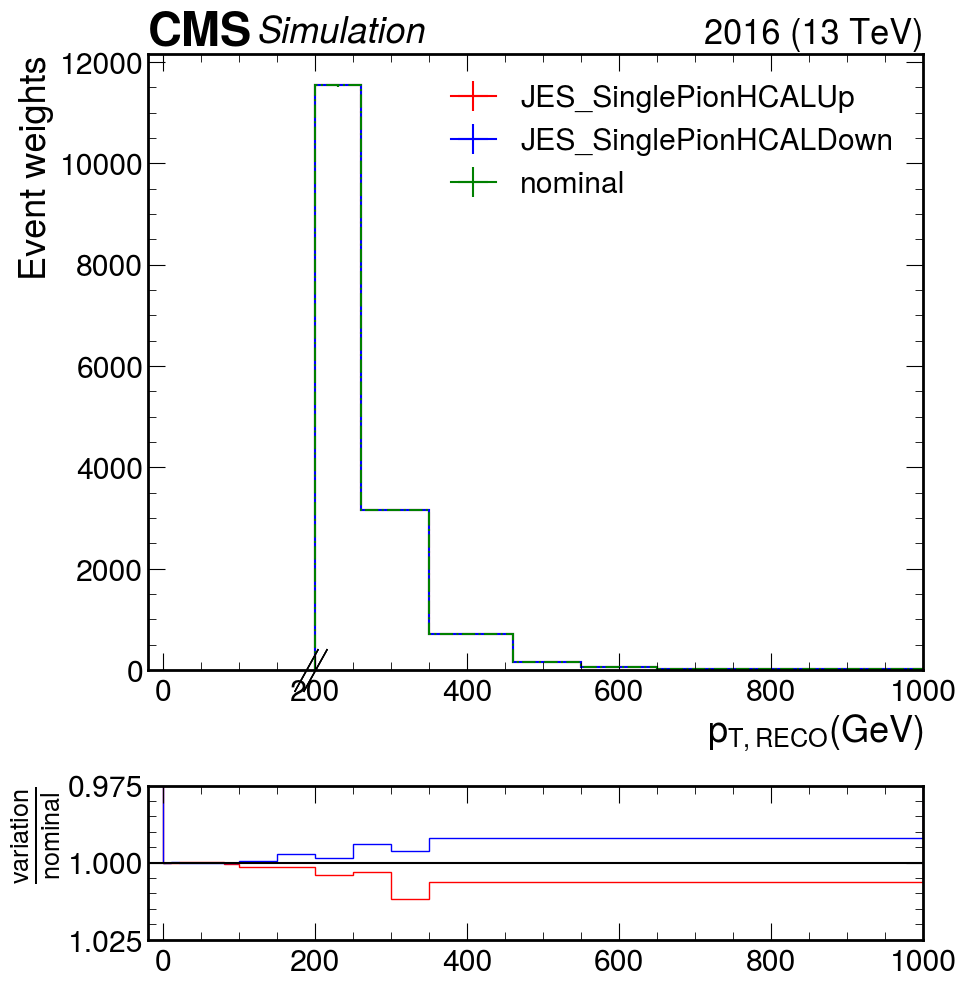

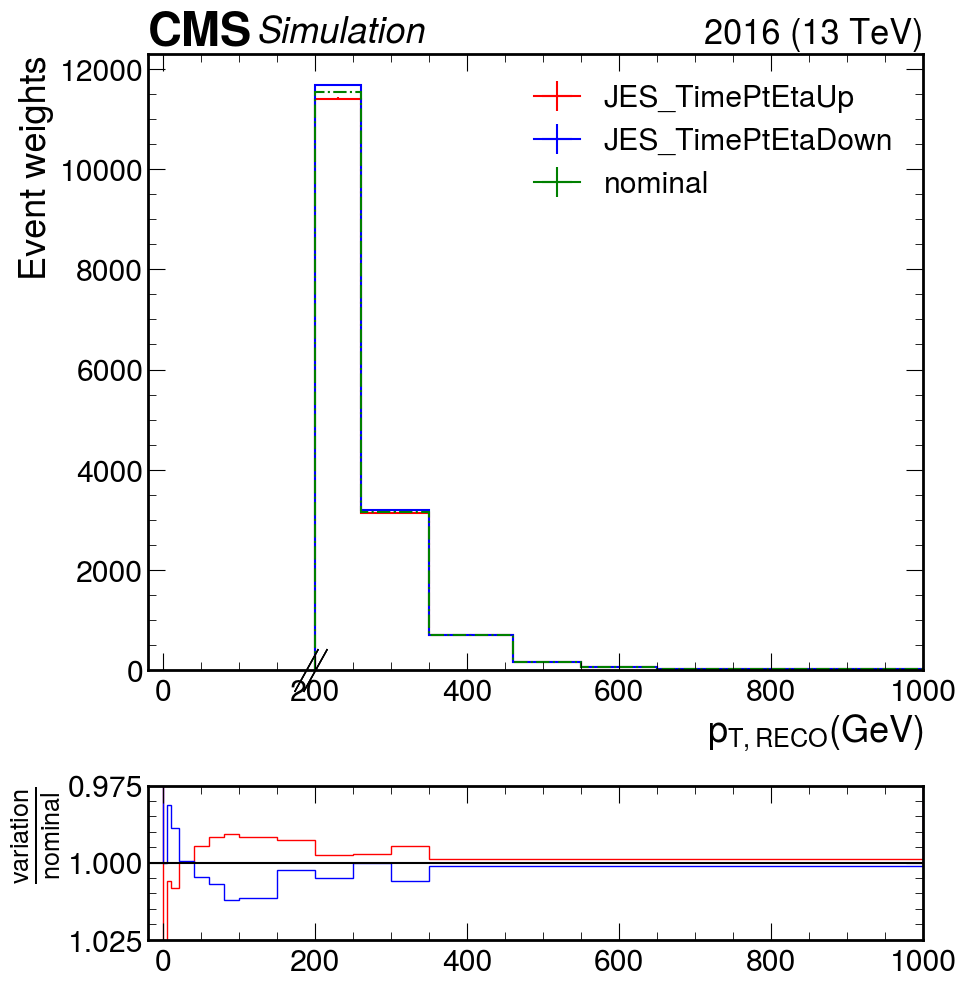

In [182]:
save_syst_plots(variable = "ptreco" , year = "2016", systematics = syst_list)

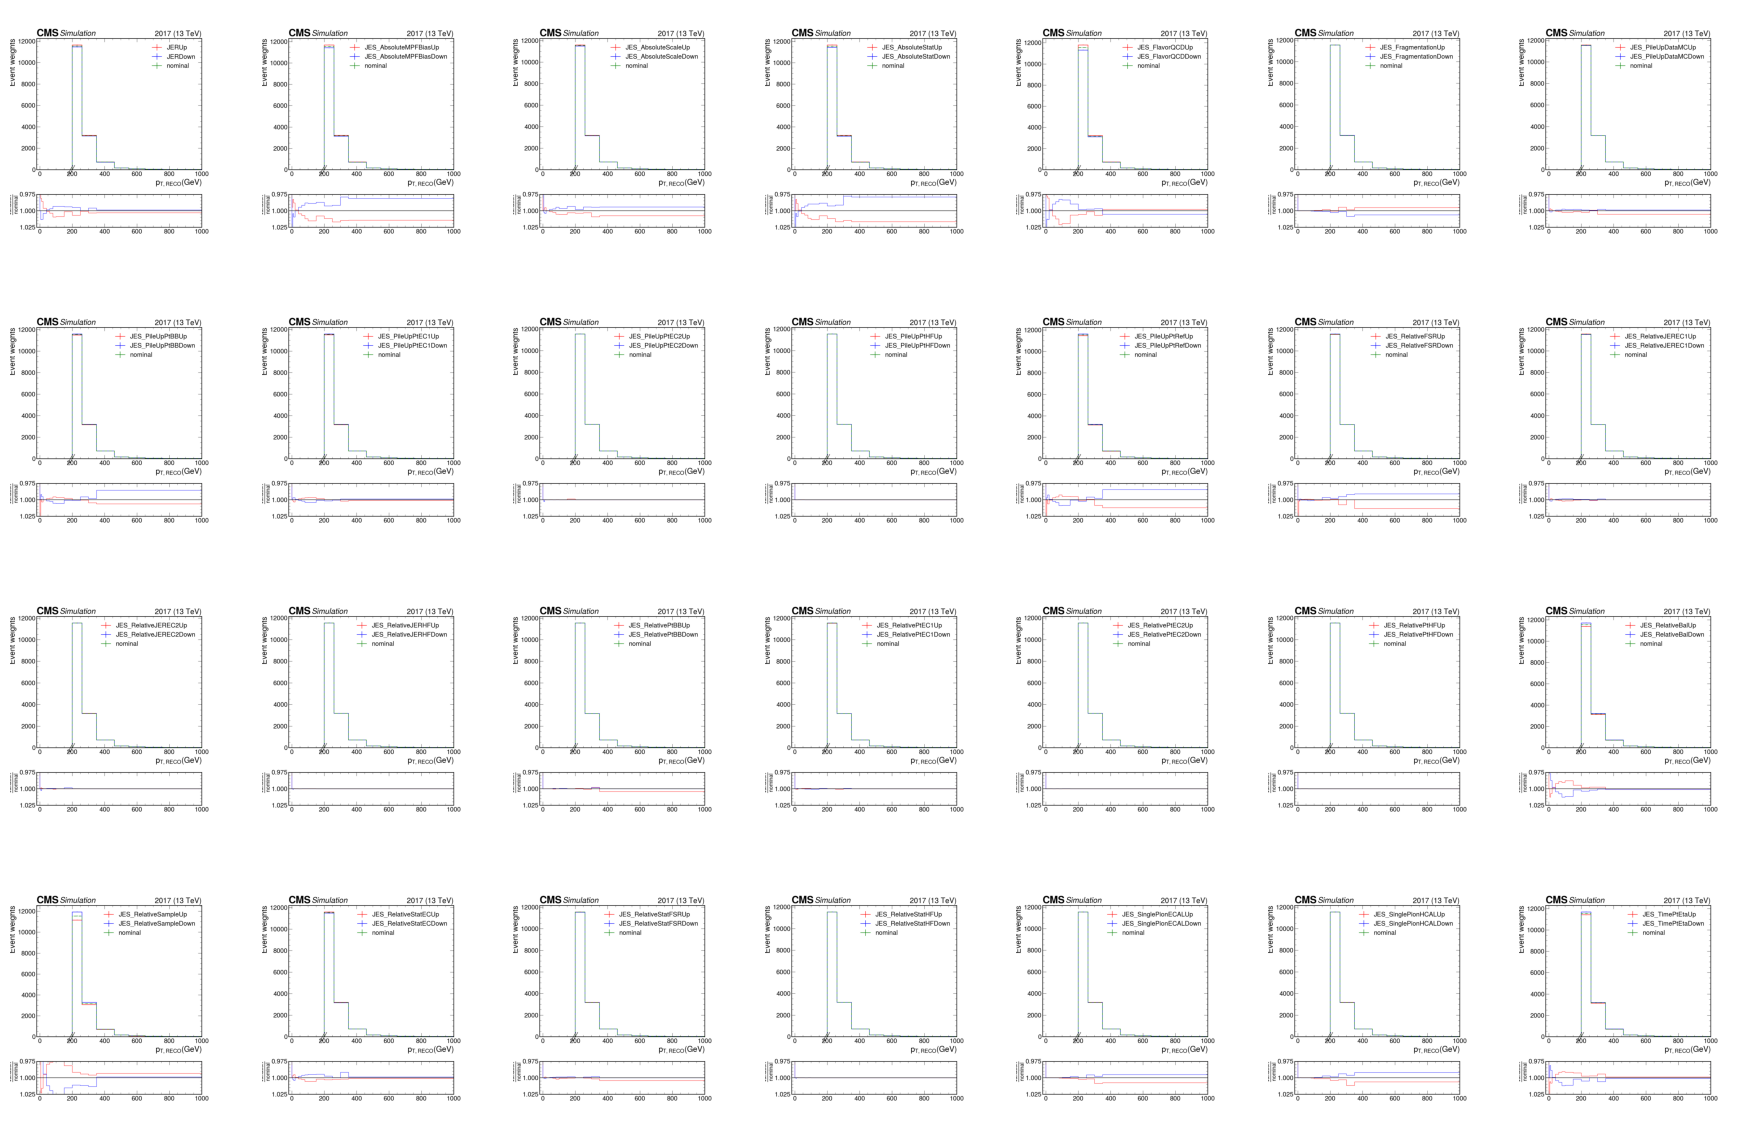

In [181]:
import matplotlib.image as mpimg

year = 2017
variable = "ptreco"
# Replace with the actual paths to your 28 images
image_paths = ["plots/{}/jet_syst/{}_{}_{}.png".format(year, year, variable, syst) for syst in syst_list ]

# Create a figure and a subplot with 5 rows and 6 columns
fig, axs = plt.subplots(4, 7, figsize=(18, 12))  # Adjust figsize as needed

# Load and display each image in the grid
for i, ax in enumerate(axs.flat):
    image = mpimg.imread(image_paths[i])
    ax.imshow(image)
    ax.axis('off')
    if i == len(image_paths)-1:
        break

    
# Adjust spacing between images
plt.tight_layout()
plt.savefig("plots/{}/jet_syst/{}_{}_all.png".format(year, year, variable), dpi = 300)
# Show the plot
plt.show()

In [142]:
year = 2016
variable = "mreco"
image_paths = ["plots/{}/jet_syst/{}_{}.png".format(year, variable, syst) for syst in syst_list ]